In [2]:
%pylab inline
import pandas as pd
import plotnine as p

Populating the interactive namespace from numpy and matplotlib


/Users/vale/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [58]:
from scipy import optimize

In [11]:
merfish = pd.read_csv('../MERFISH/data/rep6/middle_exp_mat.csv', index_col=0)

In [19]:
seqfish = pd.read_csv('../SeqFISH/exp_mat_43.csv', index_col=0).T

In [26]:
st_mob = pd.read_csv('../MouseOB/data/Rep11_MOB_0.csv', index_col=0)

In [36]:
st_bc = pd.read_table('../BreastCancer/data/Layer2_BC_count_matrix-1.tsv', index_col=0)

In [40]:
data = {
    'MERFISH': merfish,
    'SeqFISH': seqfish,
    'ST (MOB)': st_mob,
    'ST (BC)': st_bc
}

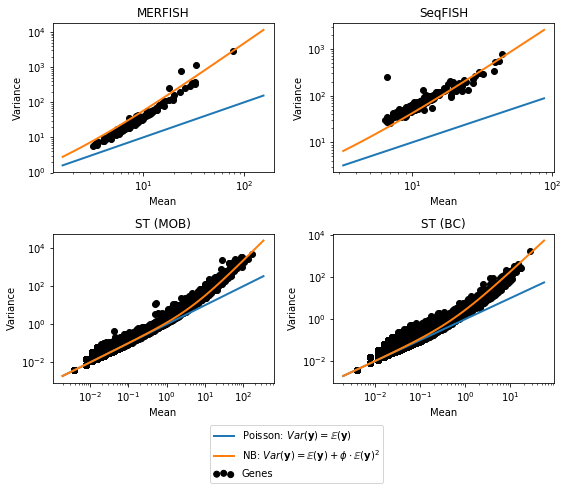

In [132]:
figsize(8, 6)

i = 0
for dname in data:
    i += 1
    
    plt.subplot(2, 2, i)
    
    ds = data[dname]

    xmin, xmax = ds.mean().min() / 2, ds.mean().max() * 2

    phi_hat, _ = optimize.curve_fit(lambda mu, phi: mu + phi * mu ** 2,
                                    ds.mean(),
                                    ds.var())

    xx = np.logspace(log10(xmin), log10(xmax))

    plt.loglog()
    plt.scatter(ds.mean(), ds.var(), c='k', label='Genes', rasterized=True)
    plt.plot([xmin, xmax], [xmin, xmax], label='Poisson: $ Var(\mathbf{y}) = \mathbb{E}(\mathbf{y}) $', lw=2)
    plt.plot(xx, xx + phi_hat * xx ** 2, label='NB: $ Var(\mathbf{y}) = \mathbb{E}(\mathbf{y}) + \phi \cdot \mathbb{E}(\mathbf{y})^2 $', lw=2)

    plt.title(dname);
    plt.xlabel('Mean')
    plt.ylabel('Variance');
    
plt.legend(scatterpoints=3, bbox_to_anchor=(0.25, -0.25))
    
plt.tight_layout()

plt.savefig('mean-vs-var.pdf', bbox_inches='tight', dpi=200)

In [108]:
import NaiveDE

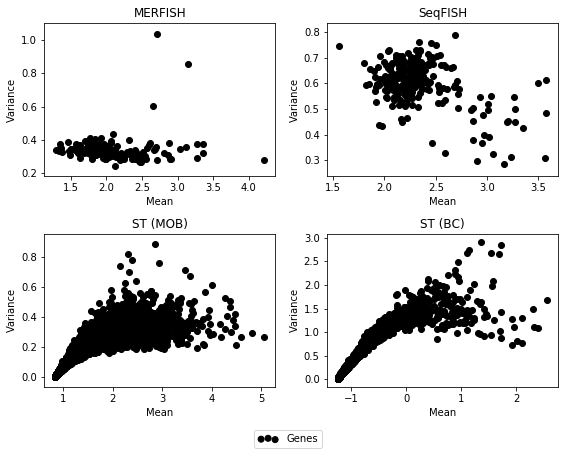

In [133]:
i = 0
for dname in data:
    i += 1
    
    plt.subplot(2, 2, i)

    ds = data[dname]
    sds = NaiveDE.stabilize(ds.T).T
    
    plt.scatter(sds.mean(), sds.var(), c='k', label='Genes', rasterized=True)
    
    plt.title(dname);
    plt.xlabel('Mean')
    plt.ylabel('Variance');
    
plt.legend(scatterpoints=3, bbox_to_anchor=(0.0, -0.25))

plt.tight_layout()

plt.savefig('Anscombe-mean-vs-var.pdf', bbox_inches='tight', dpi=200)